# Introduction

For this project, data from the World Health Organization and World Bank were investigated to see if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2. Get The Data

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Step 3. Examine The Data

Number of rows and columns:

In [3]:
df.shape

(96, 4)

Information about the table:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Country                             96 non-null object
Year                                96 non-null int64
Life expectancy at birth (years)    96 non-null float64
GDP                                 96 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Statistical data:

In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


More about the data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

Six countries represented in the data:

In [6]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Years are represented in the data:

In [7]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

## Step 4. Edit The DataFrame

In [8]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Change column name to exclude spaces:

In [9]:
df.rename(columns={'Life expectancy at birth (years)':'LEaB(yrs)'}, inplace=True)

Check new column name:

In [10]:
print(df.head())

  Country  Year  LEaB(yrs)           GDP
0   Chile  2000       77.3  7.786093e+10
1   Chile  2001       77.3  7.097992e+10
2   Chile  2002       77.8  6.973681e+10
3   Chile  2003       77.9  7.564346e+10
4   Chile  2004       78.0  9.921039e+10


---

## Step 5. Bar Charts To Compare Average

**Bar chart; Country & GDP:**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

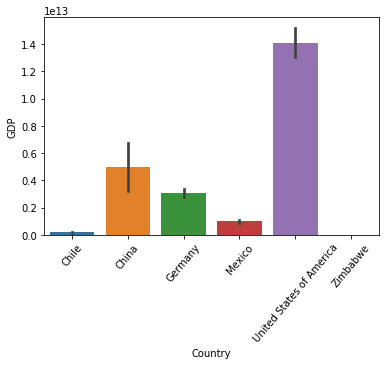

In [11]:
sns.barplot(
    data = df,
    x = 'Country',
    y = 'GDP')
plt.xticks(rotation=50)

NOTE: The GDP for the United States of America is much higher than the 5 other countries.

**Bar chart; Country & Life Expectancy at Birth (years):**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

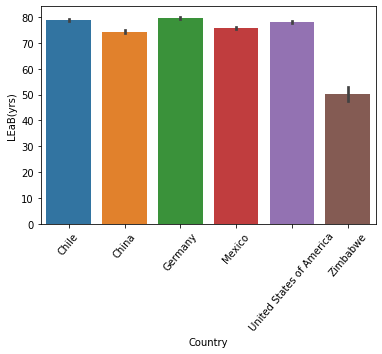

In [12]:
sns.barplot(
    data = df,
    x = 'Country',
    y = 'LEaB(yrs)')
plt.xticks(rotation=50)

 NOTE: Life expectancy at birth for Zimbabwe is about 30 years less than the other 5 countries.

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Violin plots help visualize distributions and display patterns in the shapes.

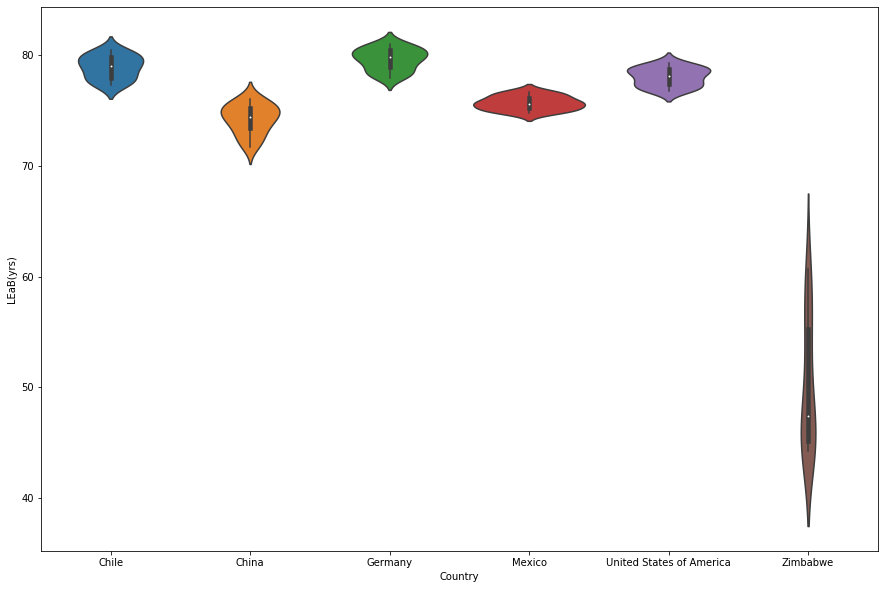

In [13]:
fig = plt.subplots(figsize=(15, 10)) 
sns.violinplot(
    data = df,
    x = 'Country',
    y = 'LEaB(yrs)')

## Step 7. Bar Plots Of GDP and Life Expectancy over time

Comparing the GDPs of the countries over time will give a sense of the relationship between GDP and life expectancy. 

**GDP:**

Text(0.5, 1.0, 'GDP from 2000-2015')

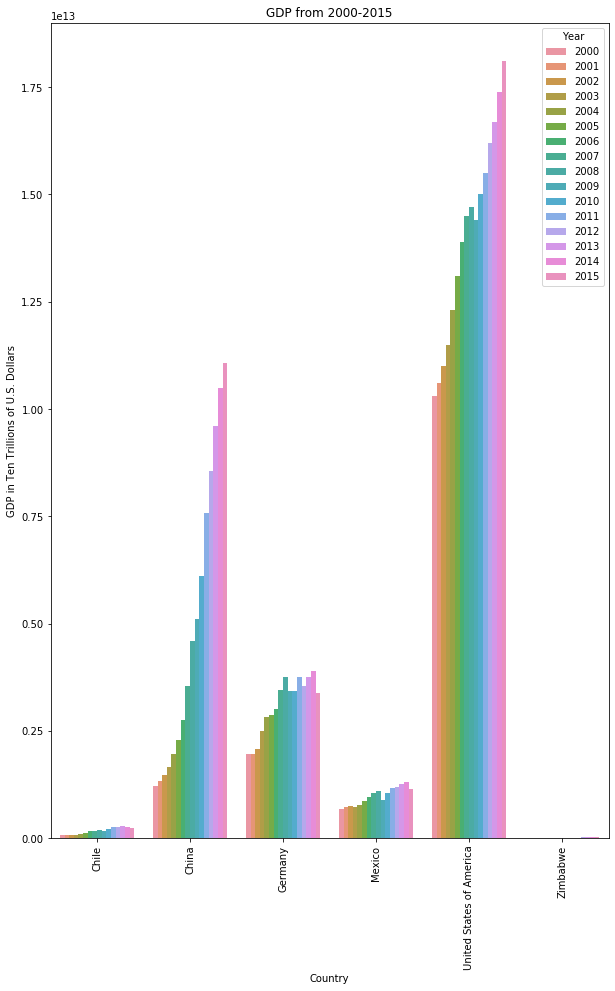

In [14]:
f, ax = plt.subplots(figsize=(10, 15))
sns.barplot(
    data = df,
    x = 'Country',
    y = 'GDP',
    hue = 'Year'
)
plt.xticks(rotation=90)
plt.ylabel('GDP in Ten Trillions of U.S. Dollars')
plt.title('GDP from 2000-2015')

Text(0, 0.5, 'GDP in Ten Billions of U.S. Dollars')

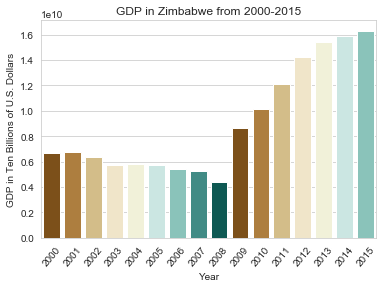

In [15]:
#examine Zimbabwe and Chile more closely
z_df = df[df.Country == 'Zimbabwe']
chile_df = df[df.Country == 'Chile']


colors = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5d5','#c7eae5','#80cdc1','#35978f','#01665e']
sns.set_style('whitegrid')

#plot Zimbabwe
sns.barplot(
    data = z_df,
    x = 'Year',
    y = 'GDP',
    palette = colors
)
plt.xticks(rotation=50)
plt.title('GDP in Zimbabwe from 2000-2015')
plt.ylabel('GDP in Ten Billions of U.S. Dollars')

Text(0, 0.5, 'GDP in Hundred Billions of U.S. Dollars')

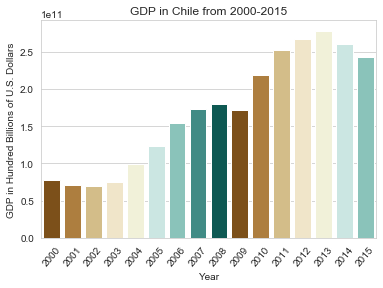

In [16]:
#plot Chile
sns.barplot(
    data = chile_df,
    x = 'Year',
    y = 'GDP',
    palette = colors
)
plt.xticks(rotation=50)
plt.title('GDP in Chile from 2000-2015')
plt.ylabel('GDP in Hundred Billions of U.S. Dollars')

**Life Expectancy:**

Text(0.5, 1.0, 'Life Expectancy at Birth (Years) from 2000-2015')

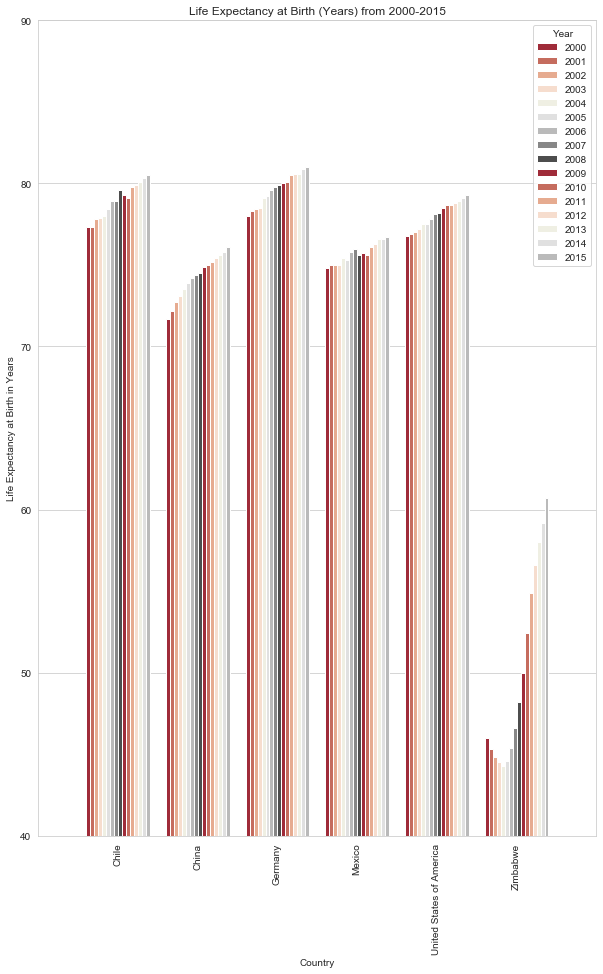

In [17]:
f, ax = plt.subplots(figsize=(10, 15)) 

leab_colors = ['#b2182b','#d6604d','#f4a582','#fddbc7','#f1f1e1','#e0e0e0','#bababa','#878787','#4d4d4d']

sns.barplot(
    data = df,
    x = 'Country',
    y = 'LEaB(yrs)',
    hue = 'Year',
    palette=leab_colors
)
plt.xticks(rotation=90)
plt.axis([-1, 6, 40, 90])
plt.ylabel('Life Expectancy at Birth in Years')
plt.title('Life Expectancy at Birth (Years) from 2000-2015')


NOTES:
+ For life expectancy, Zimbabwe has seen the greatest change over the years. For GDP, China has seen the greatest change but Zimbabwe has seen the least.
+ Most countries had a low year for GDP in 2008 or 2009 (China did not). Also, the US and China's GDPs grew quickly whereas other country's GDPs grew slowly and many dropped lower in 2015 than 2014. 
+ In 2009, Zimbabawe revalued their dollar and a new prime minister was sworn in, which may have influenced the GDP. Also, the recession from 2007 to 2009 likely influenced the GDP numbers for all countries.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

Scatter plots will make it easier to see the possible correlation between GDP and life expectancy.

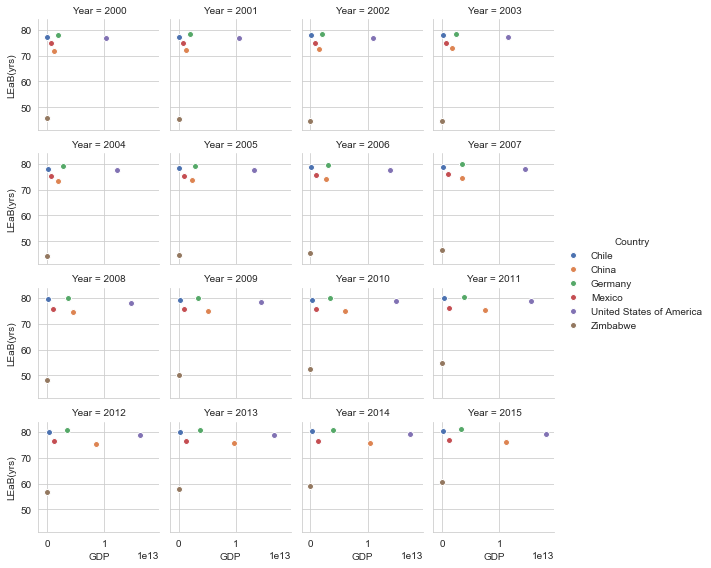

In [18]:
g = sns.FacetGrid(df, 
                  col="Year", 
                  hue="Country", 
                  col_wrap=4, 
                  height=2, 
                  palette="deep")
g = (g.map(plt.scatter, "GDP", "LEaB(yrs)", edgecolor="w").add_legend())
plt.show()

NOTE: As seen on the bar graphs, China increases most on GDP and Zimbabawe increases most on life expectancy.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it's hard to isolate the change for GDP and Life expectancy over time. 
A line graph for each GDP and Life Expectancy by country will better illustrate this. 

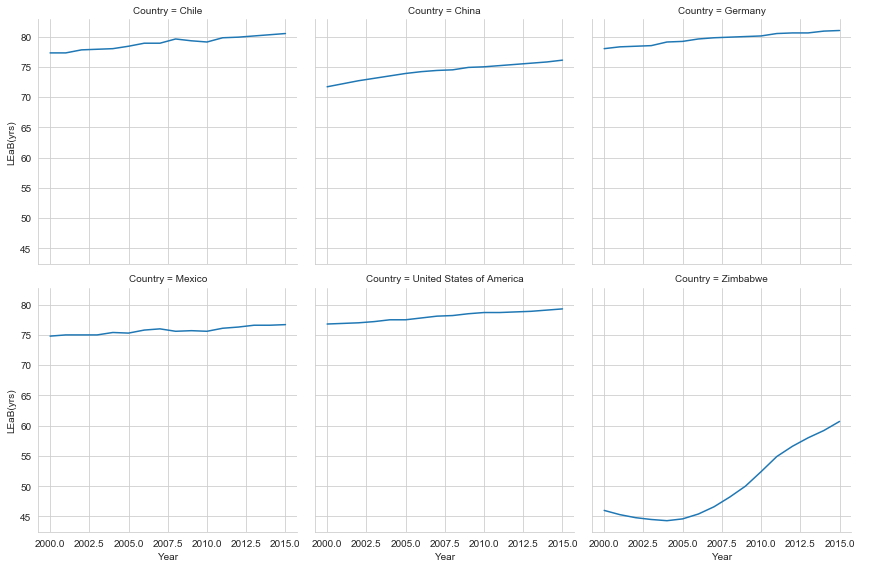

In [19]:
g3 = sns.FacetGrid(df, 
                   col="Country", 
                   col_wrap=3, 
                   height=4)
g3 = (g3.map(plt.plot, "Year", "LEaB(yrs)").add_legend())

NOTE: Highest: Germany; Lowest: Zimbabawe

## Step 10. Line Plots for GDP

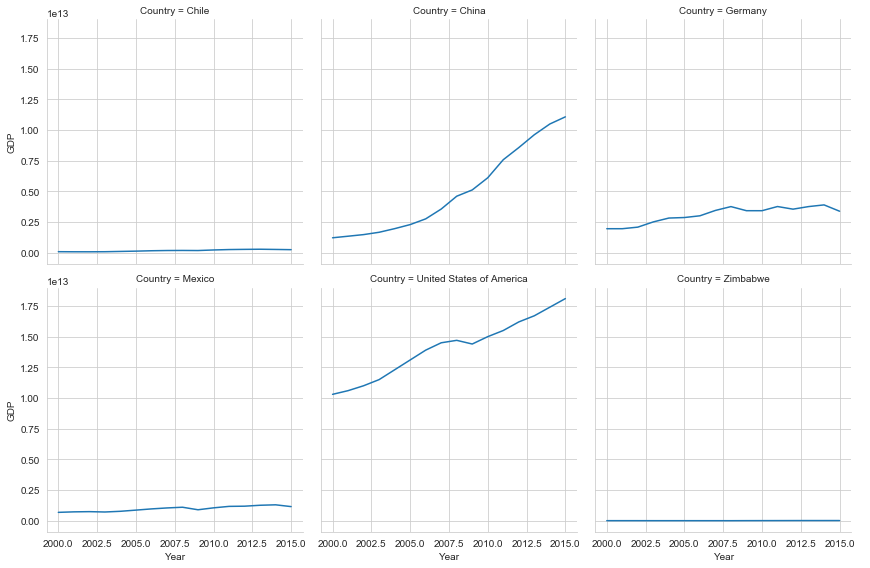

In [20]:
g3 = sns.FacetGrid(df, 
                   col="Country", 
                   col_wrap=3, 
                   height=4)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend())

NOTE: Highest: US; Lowest: Zimbabawe